# <font color='green'>Homework 4</font>

<div class="alert alert-block alert-warning">
<b>
University of Tehran<br>
Fall 2022<br>
Course: Interactive Learning<br>
</div>


***

<div class="alert alert-block alert-success">
<b>Author:</b><br>
Name: Taban Soleymani <br />
Student Number: 
</div>

***

# <span style="color:purple">Importing Required Packages and Classes</span>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from abc import ABC, abstractmethod
import gym
import math
import random
import sys
# import pygame
from IPython import display
np.set_printoptions(threshold=sys.maxsize)

# <span style="color:purple">Defining Variables</span>

In [2]:
global student_num
global num_of_repetition
global num_of_episodes 
global epsilon
global learning_rate
global discount_factor
global window_size
student_num = xxx
num_of_repetition = 20
num_of_episodes = 2000
epsilon = 0.5
learning_rate = 0.1
discount_factor = 0.9
window_size = 50

## <span style="color:purple">Environment</span>

In [3]:
env = gym.make('Taxi-v3', render_mode='rgb_array')
# env.reset(seed=student_num)
# env.render()

## <span style="color:purple">Agent</span>

In [4]:
class Agent(ABC):
    def __init__(self, env=env, lr=learning_rate, df=discount_factor, eps=epsilon):
        super(Agent, self).__init__()
        self.env = env
        self.lr = lr
        self.lr_min = 1e-3
        self.eps = eps
        self.eps_min = 1e-3
        self.df = df
        self.q_values = np.zeros([self.env.observation_space.n, self.env.action_space.n])
        self.gt_of_all_episodes = []
        self.reward_of_all_episodes = []
        
        
    def get_epsilon_greedy_action(self, state):
        if np.random.random() < self.eps:
            return self.env.action_space.sample()
        return np.argmax(self.q_values[state])
        
    
    def reset(self):
        self.lr = learning_rate
        self.eps = epsilon
        self.q_values = np.zeros([self.env.observation_space.n, self.env.action_space.n])
        #self.gt_of_all_episodes = []
        
        
    def decay_lr(self, step):
        if step <= num_of_episodes:
            self.lr = (learning_rate - self.lr_min) * (max(0, (num_of_episodes - step)) / num_of_episodes) + self.lr_min
            
        
    def decay_eps(self, step):
        if step <= num_of_episodes:
            self.eps = (epsilon - self.eps_min) * (max(0, (num_of_episodes - step)) / num_of_episodes) + self.eps_min
   

    @abstractmethod
    def execute_episode(self):
        pass

# <span style="color:purple">Part 1</span>

In [5]:
class QLearning(Agent):
    def __init__(self):
        super(QLearning, self).__init__()
        
    
    def execute_episode(self):
        rewards_in_episode = []
        gts_in_episode = []
        
        state, _ = self.env.reset(seed=student_num)
        has_reached_to_terminal = False

        while not has_reached_to_terminal:
            action = self.get_epsilon_greedy_action(state)
            next_state, reward, has_reached_to_terminal, _, _ = self.env.step(action)
            rewards_in_episode.append(reward)
            gt = reward + self.df * np.max(self.q_values[next_state])
            gts_in_episode.append(gt)
            self.q_values[state, action] = self.q_values[state, action] + self.lr * (gt - self.q_values[state, action])
            state = next_state
            
        return sum(rewards_in_episode), sum(gts_in_episode)
    
    
    def q_learning(self, decaying_lr):

        for repetition in range(num_of_repetition):
            self.reset()
            gt_per_rep = []
            reward_per_rep = []
            for episode in range(num_of_episodes):
                reward_per_episode, gt_per_episode = self.execute_episode()
                gt_per_rep.append(gt_per_episode)
                reward_per_rep.append(reward_per_episode)
                self.decay_eps(episode + 1)
                if decaying_lr:
                    self.decay_lr(episode + 1)
            self.gt_of_all_episodes.append(gt_per_rep)
            self.reward_of_all_episodes.append(reward_per_rep)

In [6]:
q_learning_agent = QLearning()
q_learning_agent.q_learning(False)
q_learning_agent_with_decaying = QLearning()
q_learning_agent_with_decaying.q_learning(True)

In [7]:
print(q_learning_agent.q_values)
print(q_learning_agent.gt_of_all_episodes[-1][-1])
print(q_learning_agent.reward_of_all_episodes[-1][-1])

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-8.88980940e-01 -6.71242288e-01 -8.45140622e-01 -7.61328151e-01
  -9.71921687e-01 -4.24030682e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-7.42488443e-01 -7.71782754e-01 -7.90245422e-01 -7.64079734e-01
  -3.55212549e+00 -1.0000

In [8]:
print(q_learning_agent_with_decaying.q_values)
print(q_learning_agent_with_decaying.gt_of_all_episodes[-1][-1])
print(q_learning_agent_with_decaying.reward_of_all_episodes[-1][-1])

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-7.33598325e-01 -7.52537370e-01 -7.40845166e-01 -6.96109784e-01
  -8.52928786e-01 -4.19003504e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-1.01208935e+00 -9.36898621e-01 -9.45363322e-01 -1.07330424e+00
  -4.20093079e+00 -3.5078

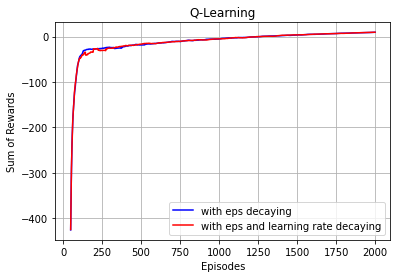

In [9]:
df_qLearning = pd.DataFrame(data=np.mean(q_learning_agent.reward_of_all_episodes, axis=0), index=range(num_of_episodes))
df_qLearningDecaying = pd.DataFrame(data=np.mean(q_learning_agent_with_decaying.reward_of_all_episodes, axis=0), index=range(num_of_episodes))

qLearning_moving = df_qLearning.rolling(window=window_size).mean()
qLearningDecaying_moving = df_qLearningDecaying.rolling(window=window_size).mean()

plt.title('Q-Learning')
plt.plot(qLearning_moving, 'b', label='with eps decaying')
plt.plot(qLearningDecaying_moving, 'r', label='with eps and learning rate decaying')
plt.ylabel('Sum of Rewards')
plt.xlabel('Episodes')
plt.legend()
plt.grid()
plt.show()

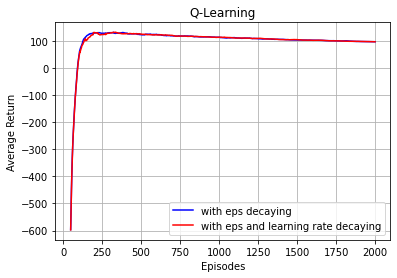

In [10]:
df_qLearning = pd.DataFrame(data=np.mean(q_learning_agent.gt_of_all_episodes, axis=0), index=range(num_of_episodes))
df_qLearningDecaying = pd.DataFrame(data=np.mean(q_learning_agent_with_decaying.gt_of_all_episodes, axis=0), index=range(num_of_episodes))

qLearning_moving = df_qLearning.rolling(window=window_size).mean()
qLearningDecaying_moving = df_qLearningDecaying.rolling(window=window_size).mean()

plt.title('Q-Learning')
plt.plot(qLearning_moving, 'b', label='with eps decaying')
plt.plot(qLearningDecaying_moving, 'r', label='with eps and learning rate decaying')
plt.ylabel('Average Return')
plt.xlabel('Episodes')
plt.legend()
plt.grid()
plt.show()

# <span style="color:purple">Part 2</span>

In [13]:
df_q = pd.DataFrame(q_learning_agent.q_values)
unreachable_states = df_q[(df_q.T == 0).any()].index.tolist()
print(unreachable_states)
print("num of unreachable states", len(unreachable_states))

[0, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 14, 15, 16, 18, 19, 20, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 34, 35, 36, 38, 39, 40, 42, 43, 44, 45, 46, 47, 48, 50, 51, 52, 54, 55, 56, 58, 59, 60, 62, 63, 64, 65, 66, 67, 68, 70, 71, 72, 74, 75, 76, 78, 79, 80, 82, 83, 84, 85, 86, 87, 88, 90, 91, 92, 94, 95, 96, 98, 99, 100, 102, 103, 104, 105, 106, 107, 108, 110, 111, 112, 114, 115, 116, 118, 119, 120, 122, 123, 124, 125, 126, 127, 128, 130, 131, 132, 134, 135, 136, 138, 139, 140, 142, 143, 144, 145, 146, 147, 148, 150, 151, 152, 154, 155, 156, 158, 159, 160, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 174, 175, 176, 178, 179, 180, 182, 183, 184, 185, 186, 187, 188, 190, 191, 192, 194, 195, 196, 198, 199, 200, 202, 203, 204, 205, 206, 207, 208, 210, 211, 212, 214, 215, 216, 218, 219, 220, 222, 223, 224, 225, 226, 227, 228, 230, 231, 232, 234, 235, 236, 238, 239, 240, 242, 243, 244, 245, 246, 247, 248, 250, 251, 252, 254, 255, 256, 258, 259, 260, 262, 263, 264, 265, 266, 267, 268, 270, 27

In [18]:
def find_reachable_states(env):
    reachable_states = []
    for state in range(env.observation_space.n):
        taxi_row, taxi_col, passenger_index, destination_index = env.decode(state)
        if passenger_index != destination_index and (taxi_row, taxi_col) != (0, 0) and (taxi_row, taxi_col) != (0, 4) \
        and (taxi_row, taxi_col) != (4, 0) and (taxi_row, taxi_col) != (4, 3):
            reachable_states.append(state)
    return reachable_states
    

In [19]:
reachable_states = find_reachable_states(env)
print(reachable_states)
print("num of unreachable states", 500 - len(unreachable_states))

[21, 22, 23, 24, 26, 27, 28, 29, 31, 32, 33, 34, 36, 37, 38, 39, 41, 42, 43, 44, 46, 47, 48, 49, 51, 52, 53, 54, 56, 57, 58, 59, 61, 62, 63, 64, 66, 67, 68, 69, 71, 72, 73, 74, 76, 77, 78, 79, 101, 102, 103, 104, 106, 107, 108, 109, 111, 112, 113, 114, 116, 117, 118, 119, 121, 122, 123, 124, 126, 127, 128, 129, 131, 132, 133, 134, 136, 137, 138, 139, 141, 142, 143, 144, 146, 147, 148, 149, 151, 152, 153, 154, 156, 157, 158, 159, 161, 162, 163, 164, 166, 167, 168, 169, 171, 172, 173, 174, 176, 177, 178, 179, 181, 182, 183, 184, 186, 187, 188, 189, 191, 192, 193, 194, 196, 197, 198, 199, 201, 202, 203, 204, 206, 207, 208, 209, 211, 212, 213, 214, 216, 217, 218, 219, 221, 222, 223, 224, 226, 227, 228, 229, 231, 232, 233, 234, 236, 237, 238, 239, 241, 242, 243, 244, 246, 247, 248, 249, 251, 252, 253, 254, 256, 257, 258, 259, 261, 262, 263, 264, 266, 267, 268, 269, 271, 272, 273, 274, 276, 277, 278, 279, 281, 282, 283, 284, 286, 287, 288, 289, 291, 292, 293, 294, 296, 297, 298, 299, 301, 30